# Project Title : - Proactive Detection Of Fraud

## Dataset Information : -
   - The data is related with predicting fraudulent transactions for a financial company .
   - Predicting fraudulent transactions were based on 10 features like 'type','amount','nameOrig','oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest','isFraud',    'isFlaggedFraud',  
      in order to predict if the transactions would be Fraud or not . 
   - The dataset :- Fraud.csv  

# Project Goal : -

#### To predict if the transaction is Fraud or not 

# Attribute Information : -

 #### Number of Attributes: 10 output attribute
  #### Input variables:
   ##### Financial Company data:
   - step : maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).
   - type : CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
   - amount - amount of the transaction in local currency.
   - nameOrig - customer who started the transaction
   - oldbalanceOrg - initial balance before the transaction
   - newbalanceOrig - new balance after the transaction 
   - nameDest - customer who is the recipient of the transaction
   - oldbalanceDest - initial balance recipient before the transaction. 
    Note that there is not information for customers that start with M (Merchants).
   - newbalanceDest - new balance recipient after the transaction. 
    Note that there is not information for customers that start with M (Merchants).
   - isFlaggedFraud - The business model aims to control massive transfers from one account to another and 
    flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

##### Output variable (desired target):
   - isFraud - This is the transactions made by the fraudulent agents inside the simulation. 
    In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and 
    try to empty the funds by transferring to another account and then cashing out of the system.

# Importing the packages : - 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading The Data : -

In [2]:
data = pd.read_csv("C:\Imp Folder\WorkstatioN\DS_Task\Fraud.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Basic Check : -

In [3]:
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
data.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
data.shape

(6362620, 11)

In [6]:
data.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
6362615    False
6362616    False
6362617    False
6362618    False
6362619    False
Length: 6362620, dtype: bool

In [7]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### We can see there is no Null value present  .

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [10]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# EDA : -

In [11]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [12]:
for col in ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
            'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
            'isFlaggedFraud']:
    print(col ,len(data[col].unique()))
    print('*'*25)

step 743
*************************
type 5
*************************
amount 5316900
*************************
nameOrig 6353307
*************************
oldbalanceOrg 1845844
*************************
newbalanceOrig 2682586
*************************
nameDest 2722362
*************************
oldbalanceDest 3614697
*************************
newbalanceDest 3555499
*************************
isFraud 2
*************************
isFlaggedFraud 2
*************************


- amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest - have high cardinality

In [13]:
data.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [14]:
data.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [15]:
data.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

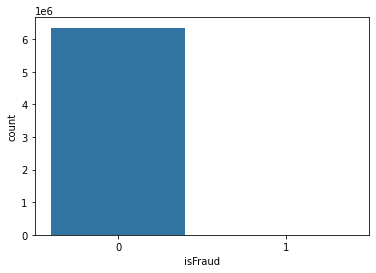

In [16]:
sns.countplot(x = 'isFraud', data = data)
plt.rcParams['figure.figsize']=(5,5)
plt.show()

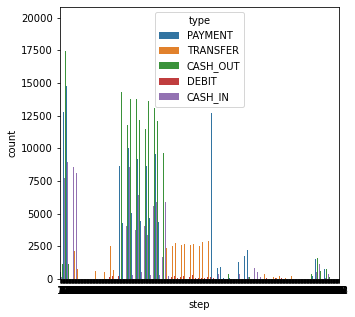

In [17]:
sns.countplot( x = 'step' ,hue = 'type' ,data = data)
plt.rcParams['figure.figsize']=(10,15)
plt.show()

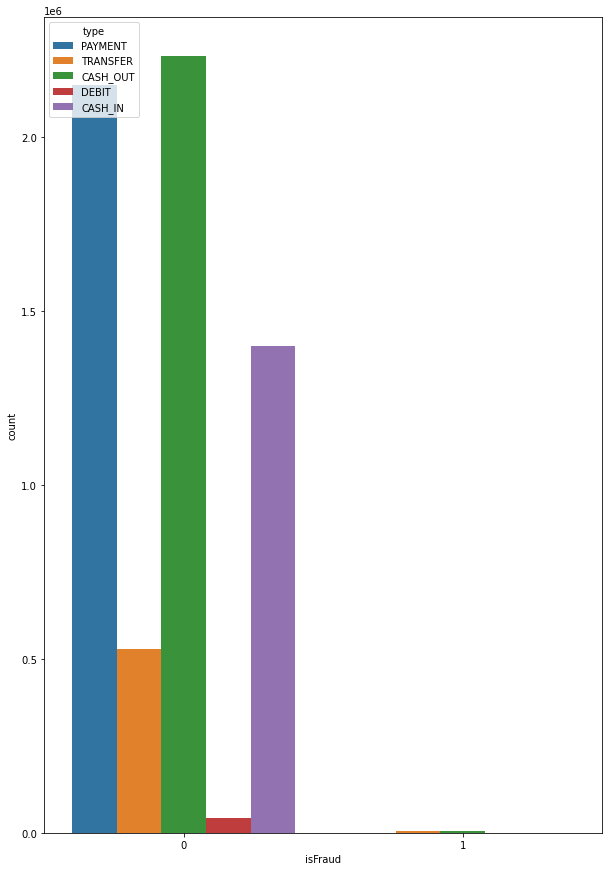

In [18]:
sns.countplot( x = 'isFraud' ,hue = 'type' ,data = data)
plt.rcParams['figure.figsize']=(15,6)
plt.show()

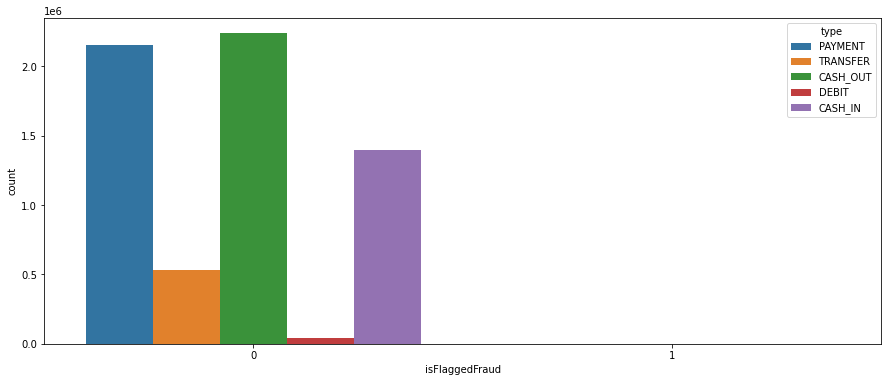

In [19]:
sns.countplot( x = 'isFlaggedFraud' ,hue = 'type' ,data = data)
plt.rcParams['figure.figsize']=(15,6)
plt.show()

<AxesSubplot:xlabel='isFraud', ylabel='step'>

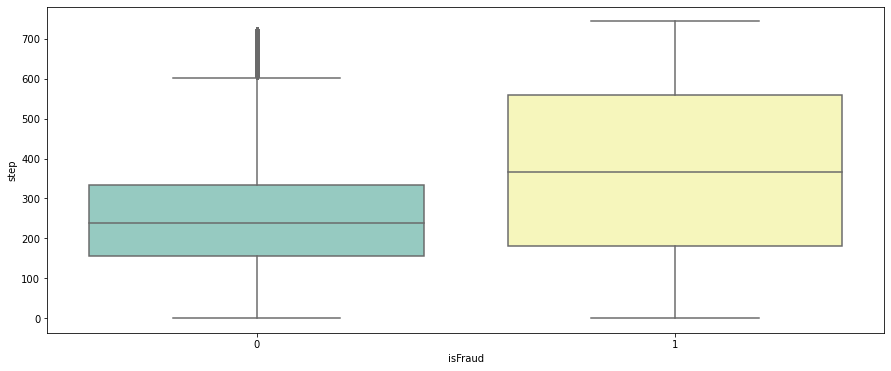

In [20]:
sns.boxplot(x='isFraud', y='step', data=data,palette = "Set3")

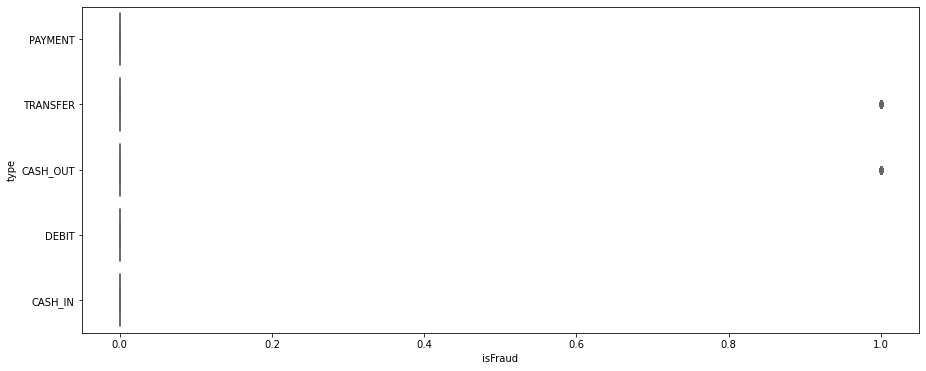

In [21]:
sns.boxplot(x='isFraud', y='type', data=data,palette = "Set3")
plt.rcParams['figure.figsize']=(15,10)

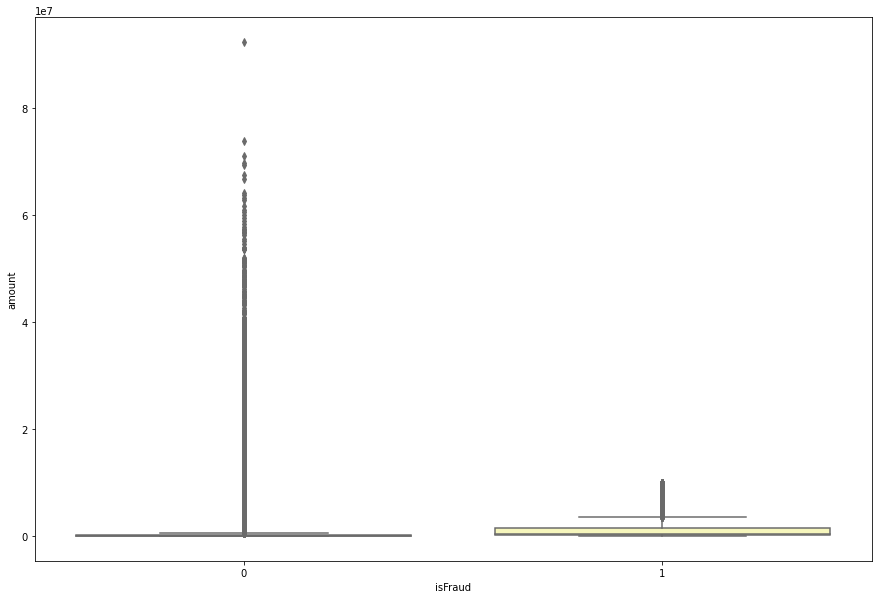

In [22]:
sns.boxplot(x='isFraud', y='amount', data=data,palette = "Set3")
plt.rcParams['figure.figsize']=(10,6)

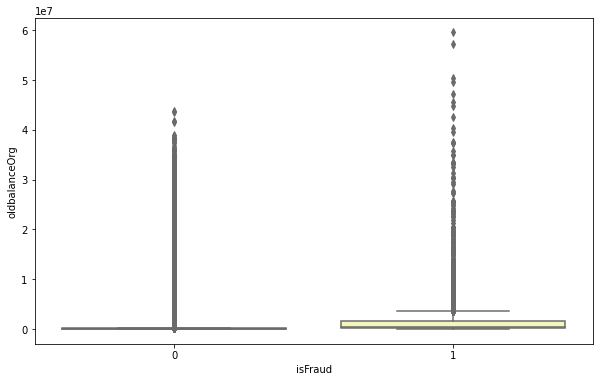

In [23]:
sns.boxplot(x='isFraud', y='oldbalanceOrg', data=data,palette = "Set3")
plt.rcParams['figure.figsize']=(10,6)

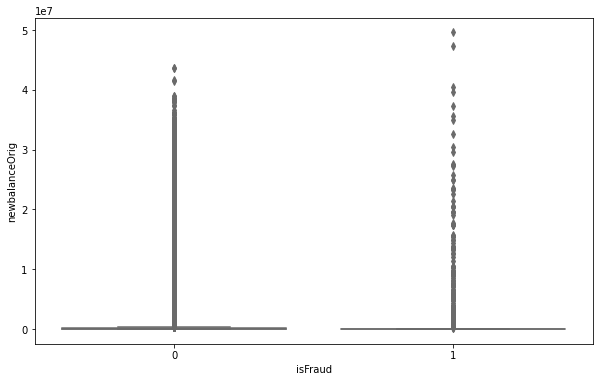

In [24]:
sns.boxplot(x='isFraud', y='newbalanceOrig', data=data,palette = "Set3")
plt.rcParams['figure.figsize']=(10,6)

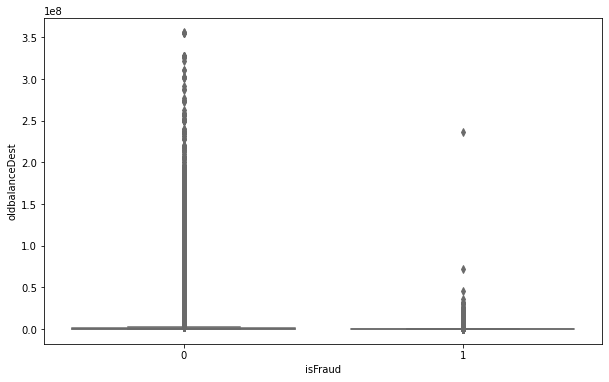

In [25]:
sns.boxplot(x='isFraud', y='oldbalanceDest', data=data,palette = "Set3")
plt.rcParams['figure.figsize']=(10,6)

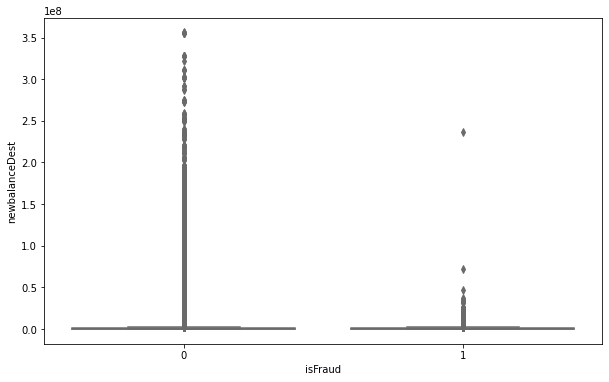

In [26]:
sns.boxplot(x='isFraud', y='newbalanceDest', data=data,palette = "Set3")
plt.rcParams['figure.figsize']=(10,6)

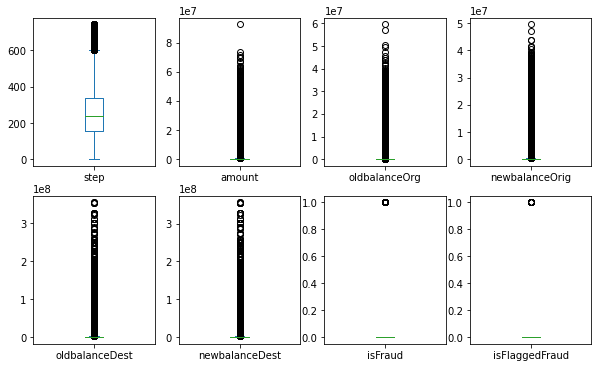

In [27]:
data.plot( kind = 'box', subplots = True,layout = (2,4))
plt.show()

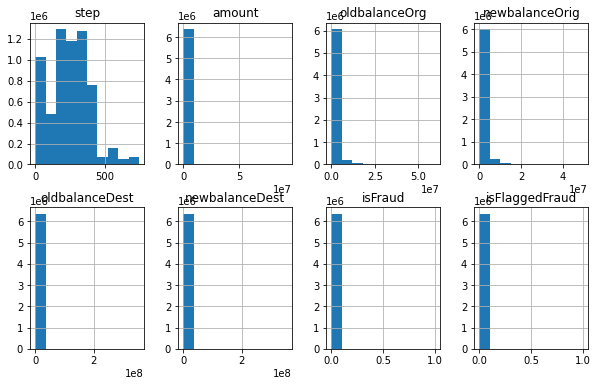

In [28]:
data.hist(layout = (2,4))
plt.show()

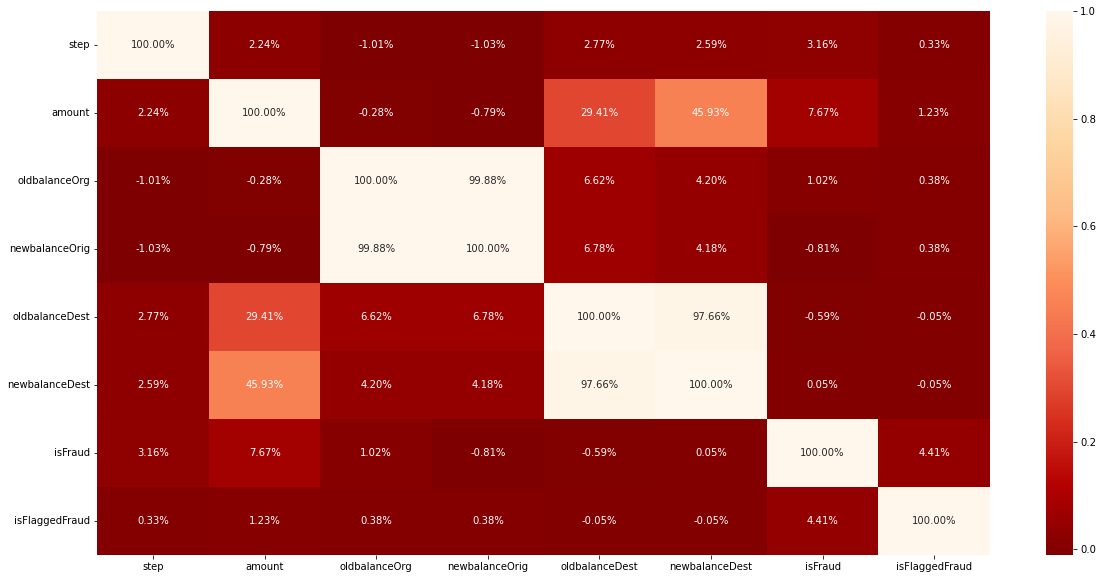

In [29]:
plt.figure(figsize=(20,10))
ax=sns.heatmap(data.corr(),annot=True,fmt='.2%', cmap='OrRd_r')

### Here we can check the correlation between the predictor . More darker color showing that it is highly correlated and the lighter color or the white color showing that less correlated with the predictor .

# Data Cleaning 

## Encoding the data

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in data.columns:
    data[column] = le.fit_transform(data[column])

In [31]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0,3,710400,757869,587897,1157557,1662094,0,0,0,0
1,0,3,141767,2188998,140919,336044,1733924,0,0,0,0
2,0,4,13666,1002156,1672,0,439685,0,0,1,0
3,0,1,13666,5828262,1672,0,391696,82843,0,1,0
4,0,3,822964,3445981,230032,456430,828919,0,0,0,0


In [32]:
#create the dataframe
df = pd.DataFrame(data)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0,3,710400,757869,587897,1157557,1662094,0,0,0,0
1,0,3,141767,2188998,140919,336044,1733924,0,0,0,0
2,0,4,13666,1002156,1672,0,439685,0,0,1,0
3,0,1,13666,5828262,1672,0,391696,82843,0,1,0
4,0,3,822964,3445981,230032,456430,828919,0,0,0,0


In [33]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR,Q1,Q3)

step                  179.00
type                    2.00
amount            2845210.25
nameOrig          3176716.50
oldbalanceOrg      438685.25
newbalanceOrig    1100493.00
nameDest           915614.25
oldbalanceDest    2028023.25
newbalanceDest    2141097.25
isFraud                 0.00
isFlaggedFraud          0.00
dtype: float64 step                  155.00
type                    1.00
amount             921335.00
nameOrig          1588331.75
oldbalanceOrg           0.00
newbalanceOrig          0.00
nameDest           216895.00
oldbalanceDest          0.00
newbalanceDest          0.00
isFraud                 0.00
isFlaggedFraud          0.00
Name: 0.25, dtype: float64 step                  334.00
type                    3.00
amount            3766545.25
nameOrig          4765048.25
oldbalanceOrg      438685.25
newbalanceOrig    1100493.00
nameDest          1132509.25
oldbalanceDest    2028023.25
newbalanceDest    2141097.25
isFraud                 0.00
isFlaggedFraud          0.00
N

In [34]:
upper_quar = print( Q3 + 1.5*IQR )

step                  602.500
type                    6.000
amount            8034360.625
nameOrig          9530123.000
oldbalanceOrg     1096713.125
newbalanceOrig    2751232.500
nameDest          2505930.625
oldbalanceDest    5070058.125
newbalanceDest    5352743.125
isFraud                 0.000
isFlaggedFraud          0.000
dtype: float64


In [35]:
lower_quar = print( Q1 - 1.5*IQR )

step                 -113.500
type                   -2.000
amount           -3346480.375
nameOrig         -3176743.000
oldbalanceOrg     -658027.875
newbalanceOrig   -1650739.500
nameDest         -1156526.375
oldbalanceDest   -3042034.875
newbalanceDest   -3211645.875
isFraud                 0.000
isFlaggedFraud          0.000
dtype: float64


In [36]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(5304788, 11)

In [37]:
data.shape

(6362620, 11)

### So now we have removed the outliars somewhat from our dataset . 

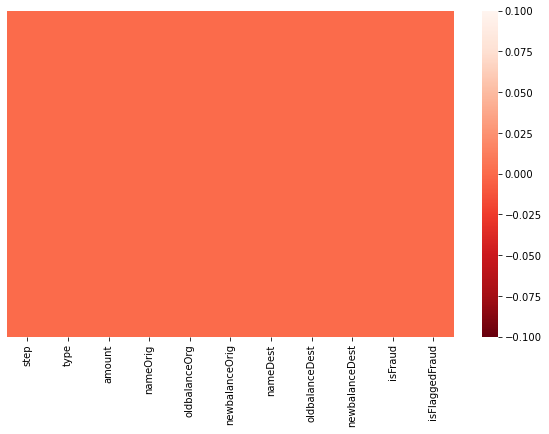

In [38]:
sns.heatmap(df.isnull(), yticklabels=False,cmap= 'Reds_r')
plt.rcParams['figure.figsize']=(10,5)

### Here we can see there is no null value present in our dataset , so now our data is clean .

# Splitting the Data

In [39]:
X = df.drop('isFraud', axis =1)
y = df['isFraud']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=20)

In [42]:
X_train.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
3560021,259,1,2913554,823653,0,0,461465,2058225,2130943,0
289694,14,4,5170785,5418641,0,0,113711,3002624,3109416,0
6065583,513,4,3137468,6053216,0,0,284294,1037869,1334297,0
2221973,185,0,1516547,560811,425650,1052792,176870,1269514,1171022,0
3592353,261,0,1556103,772003,1733344,2567919,538127,452661,327769,0


In [43]:
X_test.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
5693671,396,0,2394494,2471032,1165507,1994681,492056,1204726,965227,0
6189157,569,0,1936868,2487238,590389,1350815,563727,1713505,1598672,0
3863893,282,1,1736585,140457,0,0,450306,832127,915774,0
1806996,162,3,306583,468595,0,0,1291024,0,0,0
403593,17,3,1548595,4156158,313005,500597,1918310,0,0,0


In [44]:
y_train.head()

3560021    0
289694     0
6065583    0
2221973    0
3592353    0
Name: isFraud, dtype: int64

In [45]:
y_test.head()

5693671    0
6189157    0
3863893    0
1806996    0
403593     0
Name: isFraud, dtype: int64

# Model Building 

## Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [48]:
lg_model = LogisticRegression(max_iter=3000)
lg_model.fit(X_train,y_train)
y_pred = lg_model.predict(X_test)
accuracy_score(y_pred,y_test)

0.9993079370867137

In [49]:
confusion_matrix(y_pred,y_test)

array([[1906187,    1160],
       [    161,    1278]], dtype=int64)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906348
           1       0.89      0.52      0.66      2438

    accuracy                           1.00   1908786
   macro avg       0.94      0.76      0.83   1908786
weighted avg       1.00      1.00      1.00   1908786



## Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
accuracy_score(y_pred,y_test)

0.9996746623246399

In [53]:
dt_model = DecisionTreeClassifier(max_depth = 10,random_state= 10,max_features= None,min_samples_leaf=15)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
accuracy_score(y_pred,y_test)

0.9996526588103642

In [54]:
confusion_matrix(y_pred,y_test)

array([[1906291,     606],
       [     57,    1832]], dtype=int64)

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906348
           1       0.97      0.75      0.85      2438

    accuracy                           1.00   1908786
   macro avg       0.98      0.88      0.92   1908786
weighted avg       1.00      1.00      1.00   1908786



## KNN (K Nearest Neighbor)

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn_model = KNeighborsClassifier(n_neighbors=6,metric='euclidean')
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_pred,y_test)

0.9993037459411375

In [68]:
confusion_matrix(y_pred,y_test)

array([[1906225,    1206],
       [    123,    1232]], dtype=int64)

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906348
           1       0.91      0.51      0.65      2438

    accuracy                           1.00   1908786
   macro avg       0.95      0.75      0.82   1908786
weighted avg       1.00      1.00      1.00   1908786



### We can see here our data is imbalanced , so we have to do the balancing .

## Balancing the Target Class

In [56]:
from imblearn.over_sampling import SMOTE

In [60]:
smote_train = SMOTE()
smote_test = SMOTE()
X_train_smote,y_train_smote = smote_train.fit_resample(X_train,y_train)
X_test_smote,y_test_smote = smote_test.fit_resample(X_test,y_test)

In [61]:
X_train_smote.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,259,1,2913554,823653,0,0,461465,2058225,2130943,0
1,14,4,5170785,5418641,0,0,113711,3002624,3109416,0
2,513,4,3137468,6053216,0,0,284294,1037869,1334297,0
3,185,0,1516547,560811,425650,1052792,176870,1269514,1171022,0
4,261,0,1556103,772003,1733344,2567919,538127,452661,327769,0


In [62]:
y_train_smote.head()

0    0
1    0
2    0
3    0
4    0
Name: isFraud, dtype: int64

## Logistic Regression after Balancing

In [63]:
LR_smote = LogisticRegression()
LR_smote.fit(X_train_smote,y_train_smote)
y_predict_LR_smote = LR_smote.predict(X_test_smote)
accuracy_score(y_test_smote,y_predict_LR_smote)

0.961124883809252

In [64]:
confusion_matrix(y_test_smote,y_predict_LR_smote)

array([[1833724,   72624],
       [  75595, 1830753]], dtype=int64)

In [65]:
print(classification_report(y_test_smote,y_predict_LR_smote))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96   1906348
           1       0.96      0.96      0.96   1906348

    accuracy                           0.96   3812696
   macro avg       0.96      0.96      0.96   3812696
weighted avg       0.96      0.96      0.96   3812696



## Decision Tree after Balancing

In [70]:
DT_smote = DecisionTreeClassifier()
DT_smote.fit(X_train_smote,y_train_smote)
y_predict_DT_smote = DT_smote.predict(X_test_smote)
accuracy_score(y_test_smote,y_predict_DT_smote)

0.9793172600175833

In [71]:
confusion_matrix(y_test_smote,y_predict_DT_smote)

array([[1905057,    1291],
       [  77566, 1828782]], dtype=int64)

In [72]:
print(classification_report(y_test_smote,y_predict_DT_smote))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98   1906348
           1       1.00      0.96      0.98   1906348

    accuracy                           0.98   3812696
   macro avg       0.98      0.98      0.98   3812696
weighted avg       0.98      0.98      0.98   3812696



## KNN after balancing

In [74]:
KNN_smote = KNeighborsClassifier()
KNN_smote.fit(X_train_smote,y_train_smote)
y_predict_KNN_smote = KNN_smote.predict(X_test_smote)
accuracy_score(y_test_smote,y_predict_KNN_smote)

0.8787464303474497

In [75]:
confusion_matrix(y_test_smote,y_predict_KNN_smote)

array([[1898318,    8030],
       [ 454273, 1452075]], dtype=int64)

In [76]:
print(classification_report(y_test_smote,y_predict_KNN_smote))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89   1906348
           1       0.99      0.76      0.86   1906348

    accuracy                           0.88   3812696
   macro avg       0.90      0.88      0.88   3812696
weighted avg       0.90      0.88      0.88   3812696




### After trying all classification algorithms, I found Decision Tree to perform well with an Accuracy score of 97.93% and also checked confusion matrix with actual and target value

### The key factors that predict fraudulent customer are 
    - type of transaction that made by customer 
    - what are the amount of the transaction that has done in local currency 
    - the customer who started the transaction
    - what is the initial balance has the customer in his/her account before the transaction
    - the new balance available after the transaction
    - the customer who is the recipient of the transaction
    - the initial balance recipient before the transaction
    - the new balance recipient after the transaction

#### These factors are making sense because depending upon these factors only we can get to know who are all the fraud and who are all not fraud


#### By cross checking again and again that the agent should not be fraud , and from the starting of account opening of a customer should be verified very strongly and keep on checking of his / her transaction . These kind of prevention should be adopted while company update its infrastructure . 


#### If we are taking these kind of actions definitely we will be safe from the fraudulent transactions and we can get to know who are all the Frauds .